In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [3]:
chessdata = pd.read_csv('cleanedCleanedChessdata.csv')
chessdata['Opening_new'].describe()


count               197768
unique                  90
top       Sicilian Defense
freq                 27238
Name: Opening_new, dtype: object

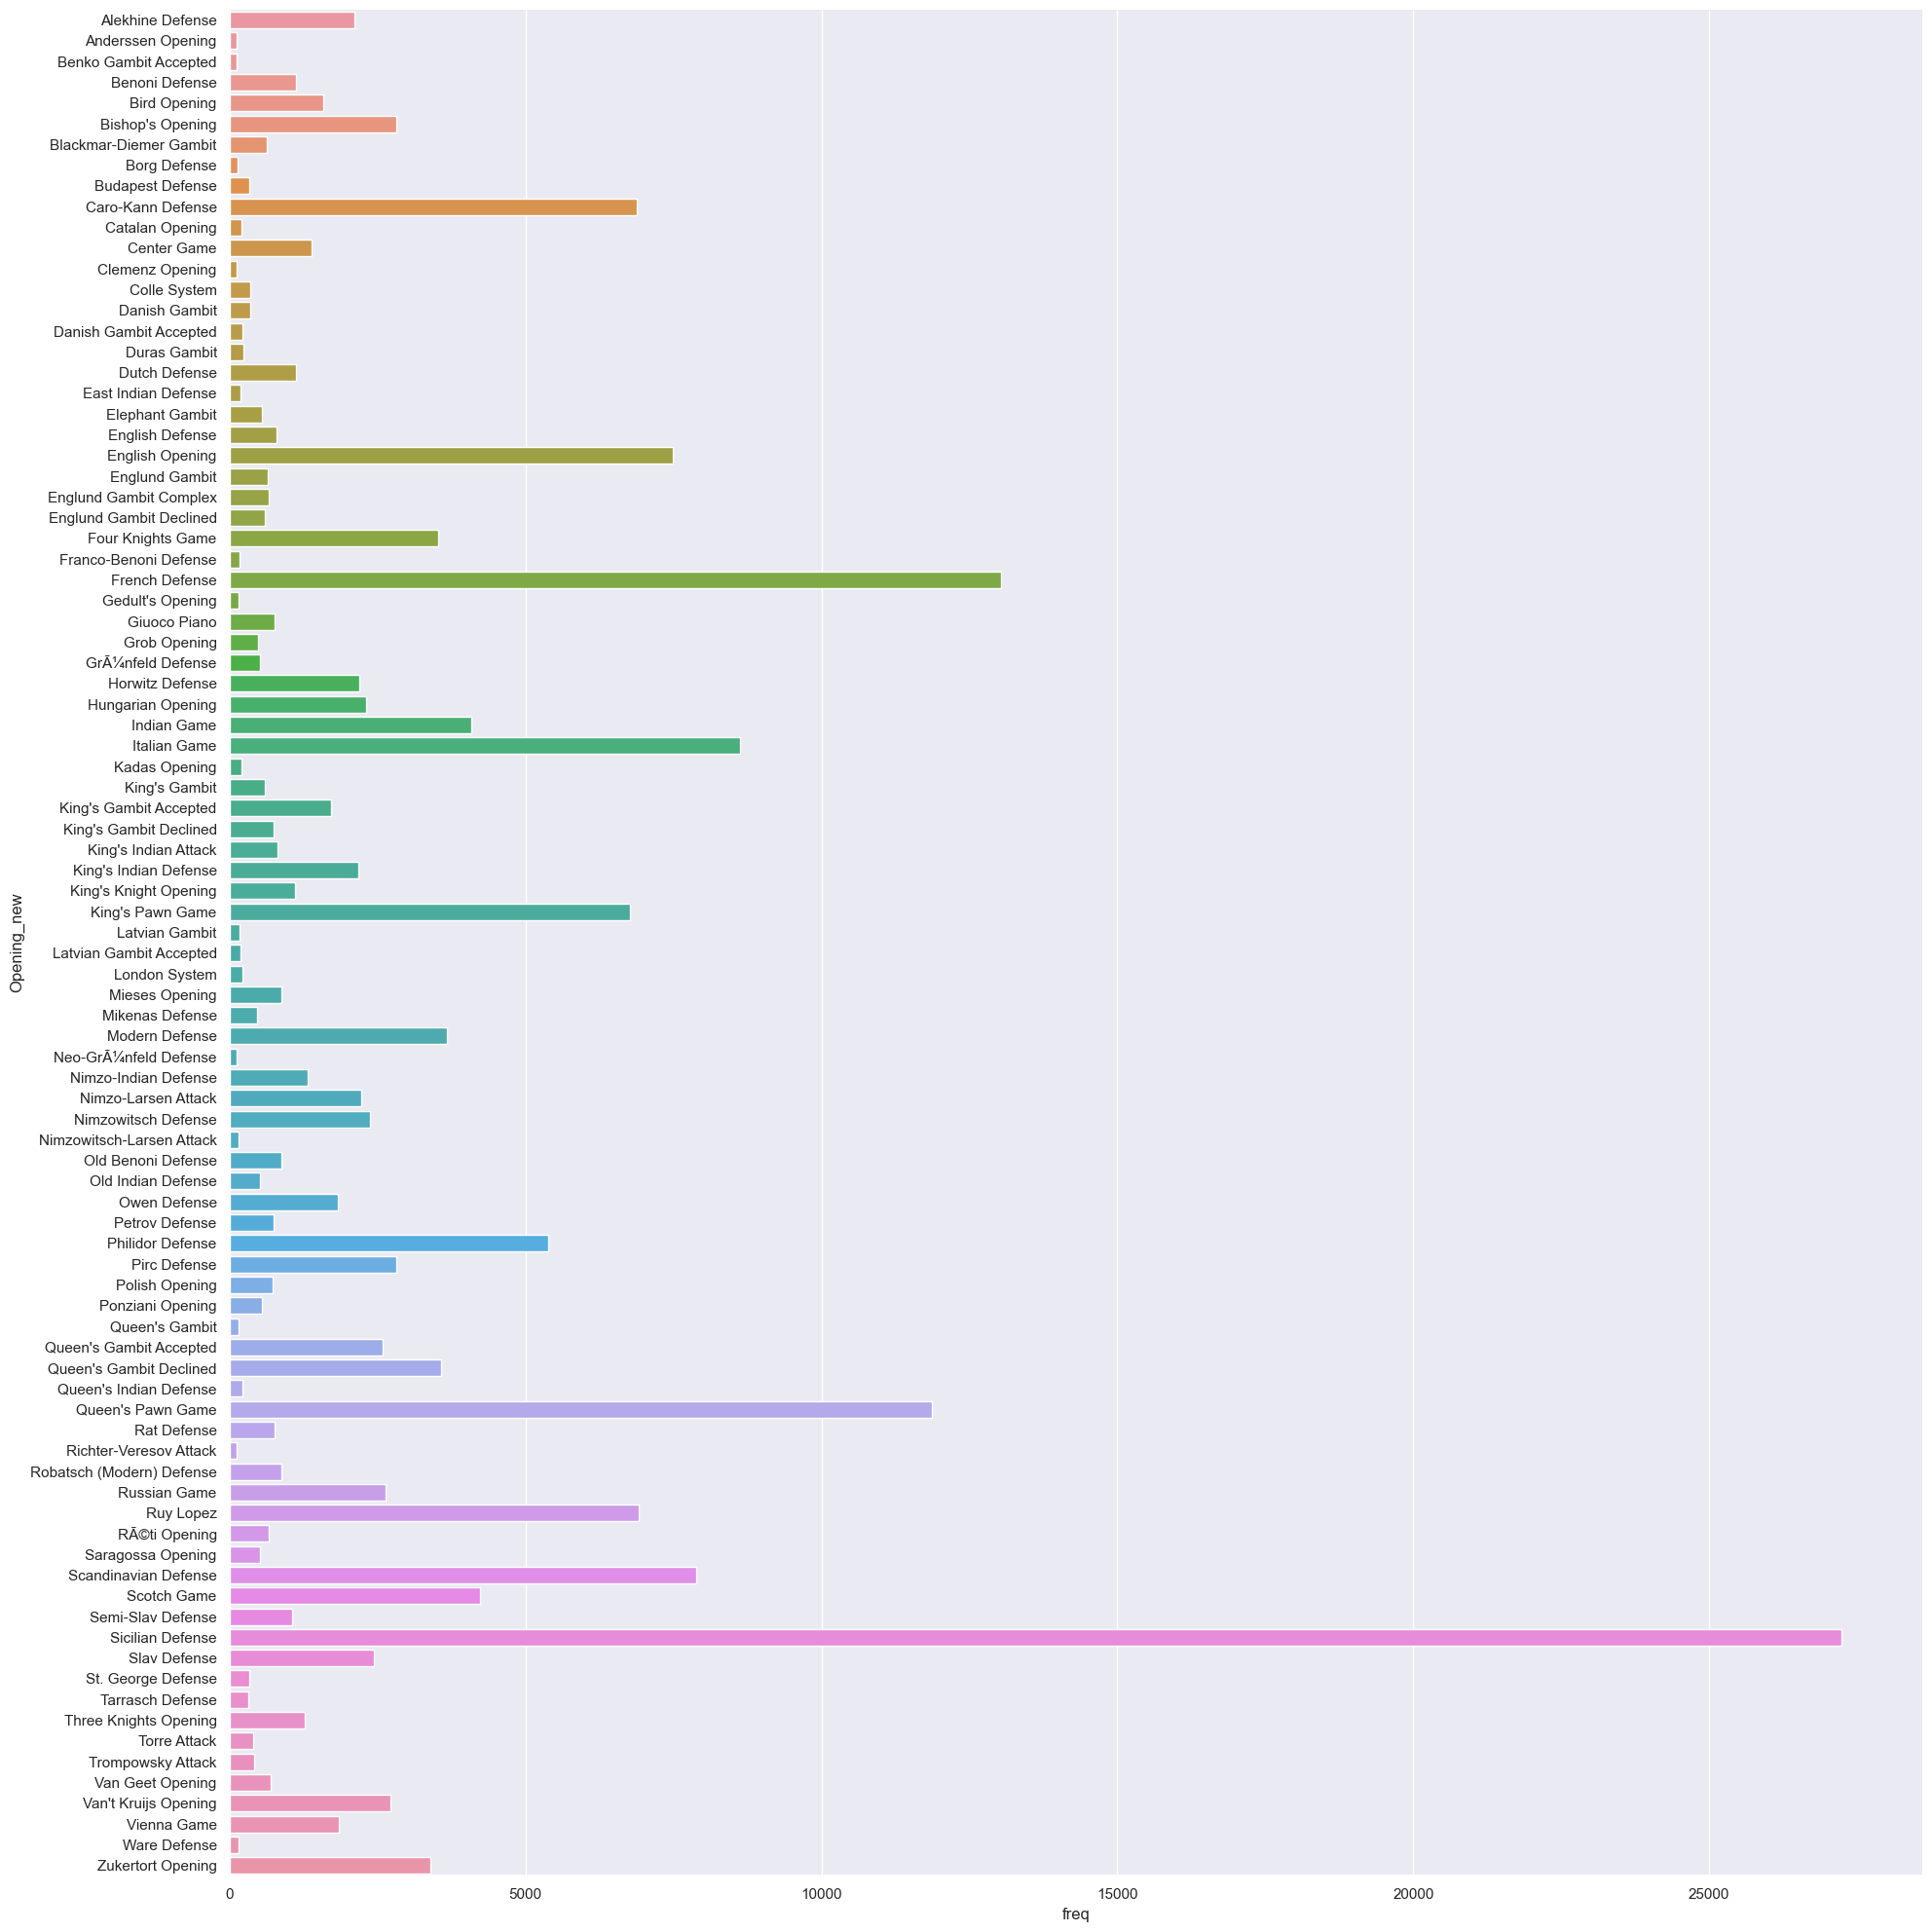

In [4]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [5]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
# frgeeq_n



In [6]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]
temp = temp[temp.Result != '*']

#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0


temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


,Opening_new,tot,win,win_rate
5167,Gedult's Opening,155,59,0.380645
35,Richter-Veresov Attack,115,45,0.391304
265,Van't Kruijs Opening,2719,1079,0.396837
2351,Clemenz Opening,115,47,0.408696
2100,East Indian Defense,182,75,0.412088
...,...,...,...,...
242,Queen's Gambit Accepted,2590,1553,0.599614
28,Englund Gambit,651,394,0.605223
2,Philidor Defense,5391,3266,0.605825
191,Nimzowitsch-Larsen Attack,143,95,0.664336


Win rate for white

In [7]:
temp = temp[temp['tot'] >500]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
265,Van't Kruijs Opening,2719,1079,0.396837
128,Mieses Opening,881,371,0.421112
668,Ponziani Opening,539,231,0.428571
37,GrÃ¼nfeld Defense,520,226,0.434615
33,Indian Game,4090,1820,0.444988
...,...,...,...,...
71,Rat Defense,755,441,0.584106
5,English Defense,795,469,0.589937
242,Queen's Gambit Accepted,2590,1553,0.599614
28,Englund Gambit,651,394,0.605223


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

In [8]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]
temp1 = temp1[temp1.Result != '*']

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)

temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
1408,Queen's Gambit,151,43,0.284768
191,Nimzowitsch-Larsen Attack,143,44,0.307692
2,Philidor Defense,5391,2004,0.371731
242,Queen's Gambit Accepted,2590,978,0.377606
28,Englund Gambit,651,246,0.37788
...,...,...,...,...
128,Mieses Opening,881,499,0.566402
35,Richter-Veresov Attack,115,67,0.582609
265,Van't Kruijs Opening,2719,1598,0.587716
2351,Clemenz Opening,115,68,0.591304


Winrate for Black

In [9]:

temp1 = temp1[temp1['tot'] >500]
temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
2,Philidor Defense,5391,2004,0.371731
242,Queen's Gambit Accepted,2590,978,0.377606
28,Englund Gambit,651,246,0.37788
71,Rat Defense,755,299,0.396026
5,English Defense,795,315,0.396226
...,...,...,...,...
19,Hungarian Opening,2313,1225,0.529615
49,Nimzo-Larsen Attack,2228,1183,0.530969
668,Ponziani Opening,539,288,0.534323
128,Mieses Opening,881,499,0.566402


Black does extremely well in the Van't Kruijs Opening, more than 5% points higher than the next best. We explained why in BlitzMid, and it is no suprise to see that a suboptimal first move suffers in the more competitive format.

In [10]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
chessdata = chessdata[chessdata.Result != '*']

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]


In [11]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))
predictors_cat_ohe

,Opening_new_Alekhine Defense,Opening_new_Anderssen Opening,Opening_new_Benko Gambit Accepted,Opening_new_Benoni Defense,Opening_new_Bird Opening,Opening_new_Bishop's Opening,Opening_new_Blackmar-Diemer Gambit,Opening_new_Borg Defense,Opening_new_Budapest Defense,Opening_new_Caro-Kann Defense,...,Opening_new_St. George Defense,Opening_new_Tarrasch Defense,Opening_new_Three Knights Opening,Opening_new_Torre Attack,Opening_new_Trompowsky Attack,Opening_new_Van Geet Opening,Opening_new_Van't Kruijs Opening,Opening_new_Vienna Game,Opening_new_Ware Defense,Opening_new_Zukertort Opening
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [23]:
# chessdata.info()
chessdata['ELO Diff'] = chessdata['WhiteElo'] - chessdata['BlackElo']
chessdata['Ave ELO']=.5*(chessdata['WhiteElo'] +chessdata['BlackElo'])
chessData_num = chessdata[['ELO Diff','Ave ELO']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)
predictors_cat_ohe[['ELO Diff', 'Ave ELO']] = chessData_num
predictors_cat_ohe['res'] = chessData_res
predictors_cat_ohe = predictors_cat_ohe.dropna()


C:\Users\rinoa\AppData\Local\Temp\ipykernel_17384\1157756684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chessdata['ELO Diff'] = chessdata['WhiteElo'] - chessdata['BlackElo']
C:\Users\rinoa\AppData\Local\Temp\ipykernel_17384\1157756684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chessdata['Ave ELO']=.5*(chessdata['WhiteElo'] +chessdata['BlackElo'])
C:\Users\rinoa\AppData\Local\Temp\ipykernel_17384\1157756684.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [24]:


# Extract Response and Predictors
y = pd.DataFrame(predictors_cat_ohe['res'])
X = pd.DataFrame(predictors_cat_ohe.drop('res', axis = 1))
X = X.drop('ELO Diff', axis = 1)



# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=100) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)

In [25]:
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

Train Data
Accuracy  :	 0.5052228563172723

Test Data
Accuracy  :	 0.5061185275080906



[Text(0.5777243589743589, 0.9285714285714286, 'Opening_new_Philidor Defense <= 0.5\ngini = 0.524\nsamples = 138430\nvalue = [65529, 3581, 69320]\nclass = White'),
 Text(0.3157051282051282, 0.7857142857142857, 'Ave ELO <= 1822.75\ngini = 0.525\nsamples = 134667\nvalue = [63999, 3490, 67178]\nclass = White'),
 Text(0.17307692307692307, 0.6428571428571429, "Opening_new_Queen's Gambit Accepted <= 0.5\ngini = 0.521\nsamples = 111789\nvalue = [53563, 2490, 55736]\nclass = White"),
 Text(0.09615384615384616, 0.5, "Opening_new_Van't Kruijs Opening <= 0.5\ngini = 0.521\nsamples = 110161\nvalue = [52867, 2459, 54835]\nclass = White"),
 Text(0.05128205128205128, 0.35714285714285715, 'Opening_new_Sicilian Defense <= 0.5\ngini = 0.521\nsamples = 108480\nvalue = [51972, 2428, 54080]\nclass = White'),
 Text(0.02564102564102564, 0.21428571428571427, 'Opening_new_Hungarian Opening <= 0.5\ngini = 0.521\nsamples = 93255\nvalue = [44440, 2098, 46717]\nclass = White'),
 Text(0.01282051282051282, 0.07142857

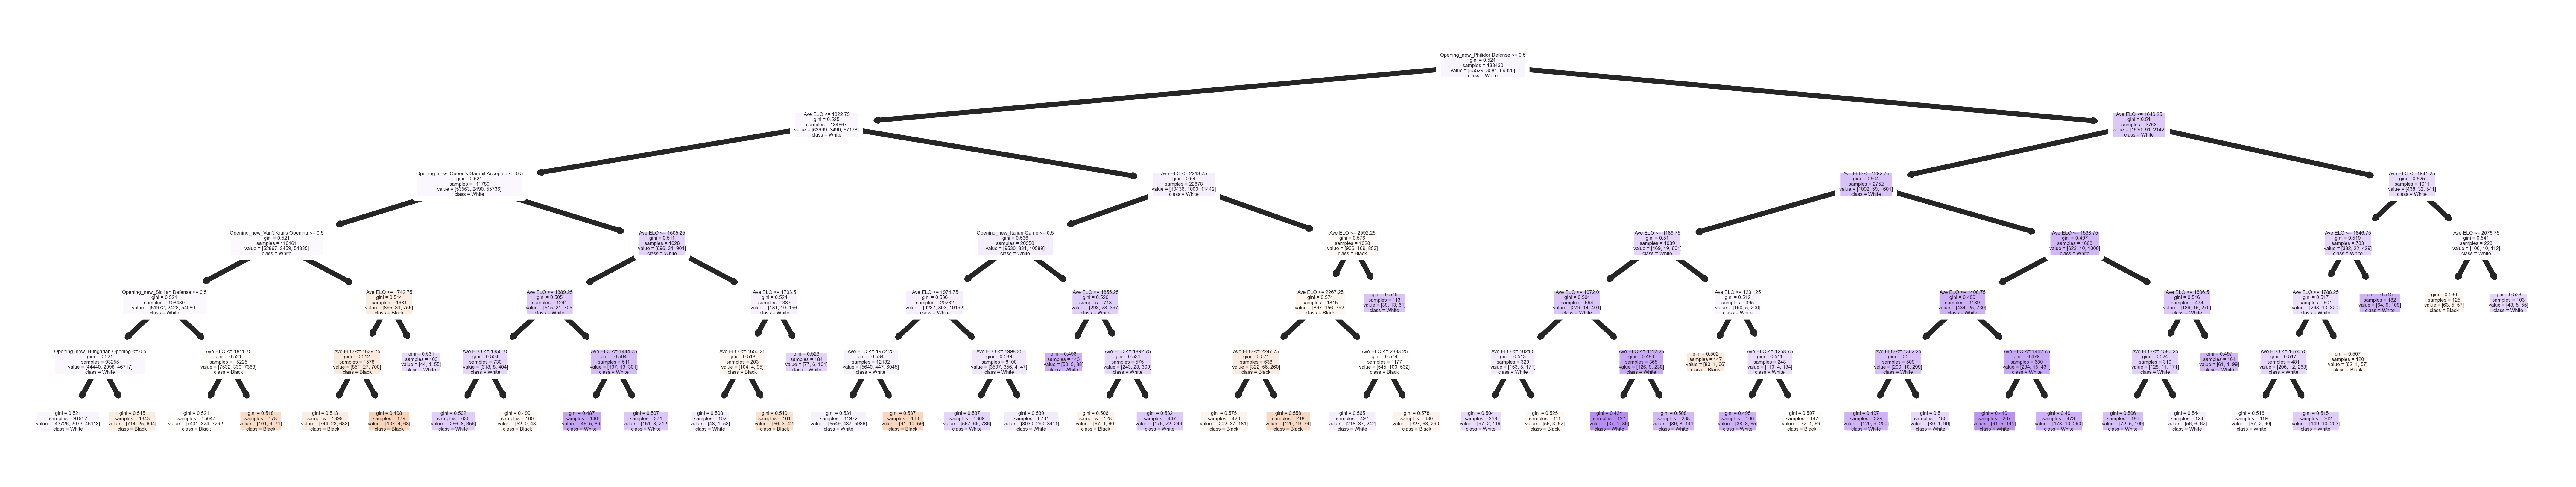

In [26]:
f = plt.figure(dpi=1200, figsize=(9,1.5),linewidth=.1)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])



![The Philidor Defence](./restleft.png "Title")

![The Philidor Defence](./restright.png "Title")

In [31]:
above2000=chessdata.loc[chessdata['Ave ELO'] >2000]
above2000QGA=above2000.loc[above2000['Opening_new']=="Queen's Gambit Accepted"]
above2000QGA.describe()

,Unnamed: 0.1,Unnamed: 0,Index.1,BlackElo,BlackRatingDiff,WhiteElo,WhiteRatingDiff,freq,tot,ELO Diff,Ave ELO
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0,74.0,74.000000,74.000000
mean,109466.283784,110703.121622,12516.337838,2147.378378,2.162162,2143.175676,-1.378378,2590.0,2590.0,-4.202703,2145.277027
std,56662.368792,57299.266128,7431.739206,181.537324,14.346043,189.990869,13.343412,0.0,0.0,178.335145,163.019352
min,3412.000000,3445.000000,216.000000,1858.000000,-39.000000,1891.000000,-58.000000,2590.0,2590.0,-521.000000,2010.500000
25%,61228.500000,61946.250000,6013.250000,2022.500000,-8.000000,2016.750000,-10.000000,2590.0,2590.0,-87.750000,2036.750000
50%,115396.500000,116694.000000,13144.500000,2097.500000,4.500000,2110.500000,-3.500000,2590.0,2590.0,-3.000000,2092.250000
75%,157688.000000,159479.500000,18974.500000,2227.750000,12.000000,2205.000000,9.750000,2590.0,2590.0,93.750000,2175.625000
max,195481.000000,197686.000000,24712.000000,2748.000000,46.000000,2906.000000,34.000000,2590.0,2590.0,461.000000,2752.000000


The first branch for white is the Philidor Defence, which makes sense, the overall winrate shows that it is the strongest for white regardless of player strength. This implies that white is objectively better in this openning.

This is interesting this openning remains popular even in higher rankings. We have about 1000 games played between players of average rank above 1600, and 228 games between players of ranking 2000 and above, almost all of which white is disproportionately favored. 

These are very good chess players choosing to play a game that is almost certainly losing from the start given perfect engine play. This is in contrast to other such opennings where one side's advantage is this massive, the other side just declines playing the openning. For instance, the Queen's Gambit Accepted(QGA), which is another opening disproportionately favoring white, has only 74 games above 2000(table above). This is even accounting for the Philidor Defense being more popular, with 5391 games, than the QGA with 2590 games played.



QGA is also on the main branch and also dominating for white, though much less popular in higher rated games

Black has the Van't Kruij Opening, which has a similar problem with the QGA, it is less likely to be played the higher the rating.

Black also has an edge in the Sicilian Defense, which is also the most popular opening in the entire dataset.

![The Philidor Defence](highphoto/left.png "Title")

![The homodachi defence](./Screenshot.png "Title")

![The Philidor Defence](highphoto/right.png "Title")